<a href="https://colab.research.google.com/github/taliaebird/DeepLearning/blob/master/surfing_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing neccessary libraries
%matplotlib inline                              
%config InlineBackend.figure_format = 'retina'  

import time
import json
import copy
import os 

import requests
import cv2
from imutils import paths

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import PIL
from PIL import Image
from collections import OrderedDict

import torch
from torch import nn, optim
from torch.optim import lr_scheduler
from torch.autograd import Variable

import torchvision
from torchvision import datasets, models, transforms

from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from scipy.stats import bernoulli

from google.colab import files
import io

In [ ]:
#checking PIL version is higher than 5.3.0
print(PIL.__version__)

#ensuring we on are the GPU, should be true
print(torch.cuda.is_available())

#putting device on the gpu
device = torch.device('cuda:0')

7.0.0
True


# Getting Dataset










Uploading the surfing_data image dataset using the following tutorial: 


[Create Deep Learning Dataset](https://debuggercafe.com/create-your-own-deep-learning-image-dataset/)

The dataset was not as clean as ideal. However, model predicted very well on proper images.

The images are uploading into the following file system:
> surfing_data

>>train

>>>barrel

>>>bottom

>> valid

>>>barrel

>>>bottom

The upload currently uses a bernoulli function to put approximately 20% of the images in the validation set and the remaining in the training set.

The dataset currently supports the following classes:


*   Barrel
*   Bottom-turn

In [ ]:
#allowing user to upload files with urls putting on local
def upload():
  print('Upload Barrel URL\'s')
  file_dict = files.upload()
  barrel_path = io.BytesIO(file_dict[next(iter(file_dict))])

  print('\nUpload Bottom Turn URL\'s')
  file_dict = files.upload()
  bottom_path = io.BytesIO(file_dict[next(iter(file_dict))])
  return barrel_path, bottom_path

#getting barrel and bottom turn urls
barrel_path, bottom_path = upload()

Upload Barrel URL's


Saving barrel_urls to barrel_urls

Upload Bottom Turn URL's


Saving bottom_urls to bottom_urls


In [ ]:
#create folder system, see above for descrition

if not os.path.exists('surfing_data'):
    os.mkdir('surfing_data')
    % cd surfing_data/
    os.mkdir('train')
    os.mkdir('valid')

    % cd train/
    os.mkdir('barrel')
    os.mkdir('bottom')
    % cd .. 

    % cd valid/
    os.mkdir('barrel')
    os.mkdir('bottom')
    % cd ..
    % cd ..
    % pwd


/content/surfing_data
/content/surfing_data/train
/content/surfing_data
/content/surfing_data/valid
/content/surfing_data
/content


In [ ]:
################################################################################
     
      # BARREL

################################################################################     

url_path = open('/content/barrel_urls').read().strip().split('\n')
total = 0

#we will 
image_path = ['/content/surfing_data/train/barrel', '/content/surfing_data/valid/barrel']


for url in url_path:
    try:
      req = requests.get(url, timeout=60)
      #about 20% of the data goes to the validation set
      if bernoulli.rvs(.2):
        #validation set
        file_path = os.path.sep.join([image_path[1], '{}.jpg'.format(
            str(total).zfill(6))]
        )
      else:
        #training set
        file_path = os.path.sep.join([image_path[0], '{}.jpg'.format(
            str(total).zfill(6))]
        )
      file = open(file_path, 'wb')
      file.write(req.content)
      file.close()
      print('Downloaded {}'.format(file_path))
      total += 1
    except:
      print('Could not download {}. Downloading next file'.format(file_path))


for imagePath in paths.list_images('images'):
    delete_image = False
    try:
        image = cv2.imread(imagePath)
        if image is None:
            delete_image = True
    # if OpenCV cannot load the image
    except:
        delete_image = True
    if delete_image:
        print('Deleting {}'.format(imagePath))
        os.remove(imagePath)

Downloaded /content/surfing_data/train/barrel/000000.jpg
Downloaded /content/surfing_data/train/barrel/000001.jpg
Downloaded /content/surfing_data/train/barrel/000002.jpg
Downloaded /content/surfing_data/train/barrel/000003.jpg
Downloaded /content/surfing_data/valid/barrel/000004.jpg
Downloaded /content/surfing_data/train/barrel/000005.jpg
Downloaded /content/surfing_data/train/barrel/000006.jpg
Downloaded /content/surfing_data/train/barrel/000007.jpg
Downloaded /content/surfing_data/train/barrel/000008.jpg
Downloaded /content/surfing_data/train/barrel/000009.jpg
Downloaded /content/surfing_data/train/barrel/000010.jpg
Downloaded /content/surfing_data/train/barrel/000011.jpg
Downloaded /content/surfing_data/train/barrel/000012.jpg
Downloaded /content/surfing_data/train/barrel/000013.jpg
Downloaded /content/surfing_data/train/barrel/000014.jpg
Downloaded /content/surfing_data/valid/barrel/000015.jpg
Downloaded /content/surfing_data/valid/barrel/000016.jpg
Downloaded /content/surfing_dat

In [ ]:
################################################################################
     
      # BOTTOM TURN

################################################################################     

url_path = open('/content/bottom_urls').read().strip().split('\n')
total = 0

image_path = ['/content/surfing_data/train/bottom', '/content/surfing_data/valid/bottom']


for url in url_path:
    try:
      req = requests.get(url, timeout=60)
      #about 20% of the data goes to the validation set
      if bernoulli.rvs(.2):
        #validation set
        file_path = os.path.sep.join([image_path[1], '{}.jpg'.format(
            str(total).zfill(6))]
        )
      else:
        #training set
        file_path = os.path.sep.join([image_path[0], '{}.jpg'.format(
            str(total).zfill(6))]
        )
      file = open(file_path, 'wb')
      file.write(req.content)
      file.close()
      print('Downloaded {}'.format(file_path))
      total += 1
    except:
      print('Could not download {}. Downloading next file'.format(file_path))


for imagePath in paths.list_images('images'):
    delete_image = False
    try:
        image = cv2.imread(imagePath)
        if image is None:
            delete_image = True
    # if OpenCV cannot load the image
    except:
        delete_image = True
    if delete_image:
        print('Deleting {}'.format(imagePath))
        os.remove(imagePath)

Downloaded /content/surfing_data/valid/bottom/000000.jpg
Downloaded /content/surfing_data/train/bottom/000001.jpg
Downloaded /content/surfing_data/train/bottom/000002.jpg
Downloaded /content/surfing_data/valid/bottom/000003.jpg
Downloaded /content/surfing_data/train/bottom/000004.jpg
Downloaded /content/surfing_data/train/bottom/000005.jpg
Downloaded /content/surfing_data/train/bottom/000006.jpg
Downloaded /content/surfing_data/valid/bottom/000007.jpg
Downloaded /content/surfing_data/train/bottom/000008.jpg
Downloaded /content/surfing_data/train/bottom/000009.jpg
Downloaded /content/surfing_data/train/bottom/000010.jpg
Downloaded /content/surfing_data/valid/bottom/000011.jpg
Downloaded /content/surfing_data/train/bottom/000012.jpg
Downloaded /content/surfing_data/train/bottom/000013.jpg
Downloaded /content/surfing_data/valid/bottom/000014.jpg
Downloaded /content/surfing_data/valid/bottom/000015.jpg
Downloaded /content/surfing_data/train/bottom/000016.jpg
Downloaded /content/surfing_dat

In [ ]:
#dictionary corresponding to our tensor transformations for each data type

my_transforms = {
    'train': transforms.Compose([
                                   transforms.CenterCrop(size = 242),
                                   transforms.ToTensor(),
  ]), 
  'valid': transforms.Compose([
                               transforms.Resize(256),
                               transforms.CenterCrop(242),
                               transforms.ToTensor(),
  ])
}

In [ ]:
#getting each dataset
image_datasets = {x: datasets.ImageFolder(os.path.join('/content/surfing_data', x),
                                          my_transforms[x])
                  for x in ['train', 'valid']}

#saving information for dataloader and model
batch_size = 64
model = models.resnet152(pretrained=True)

#only care about classification params, so setting feature params to False
for param in model.parameters():
  param.requires_grad = False

#data elements in dataloader have dim (batch_size, 3, 224, 224)
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'valid']}

#saving class names, int between 1 and 102, FIXME for surfing classification
class_names = image_datasets['train'].classes
num_classes = len(class_names)

#saving the length of each of my datasets
data_sizes = {x : len(image_datasets[x]) for x in ['train', 'valid']}


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


# Testing

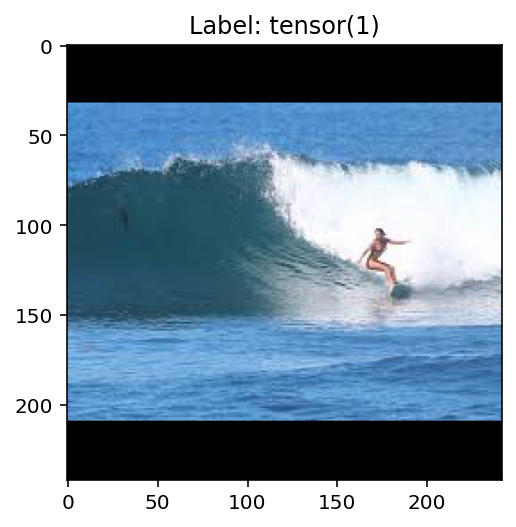

In [ ]:
#this allows us to test to make sure our data loader has images, save for later
def testing_dataloader():
  data, labels = next(iter(dataloaders['train']))
  rand_idx = np.random.randint(data.shape[0])

  #data[rand_idx] is currently 3 x 244 x 244, needs to be 244 x 244 x 3
  img = torch.transpose(data[rand_idx], 0, 1)
  img = torch.transpose(img, 1, 2)

  img_title = 'Label: ' + str(labels[rand_idx])

  plt.imshow(img)
  plt.title(img_title)

testing_dataloader()

#Training


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs, best_acc):
  #modeled after documentation: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

  #tracking training time
  since = time.time()

  #saving best weights and resetting best accuracy
  best_model_wts = copy.deepcopy(model.state_dict())

  train_accuracies = []
  valid_accuracies = []

  for epoch in range(num_epochs):
    print('------------- Epoch {}/{} -------------'.format(epoch + 1, num_epochs))
    for phase in ['train', 'valid']:
      if phase == 'train':
        model.train()
      else:
        model.eval()
      
      #resetting loss, number correct, and total
      running_loss = 0.0
      running_corrects = 0
      tot = 0

      for inputs, labels in dataloaders[phase]:
        #putting on cuda
        inputs = inputs.to(device)
        labels = labels.to(device)

        #resetting optimizer
        optimizer.zero_grad()

        #if training turning gradient calculation on
        with torch.set_grad_enabled(phase == 'train'): 
          outputs = model(inputs)

          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)

        #updating loss and the number correct
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        tot 

        if phase == 'train':
          loss.backward()
          optimizer.step()

      #calculating epoch loss and accuracy
      epoch_loss = running_loss / data_sizes[phase]
      epoch_acc = running_corrects.double() / data_sizes[phase]
      print('Phase: {} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
      print()

      #saving best weights
      if phase == 'valid' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())
    
    #printing information
    time_elapsed = time.time() - since
    print('Running Time Total {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print()

    print('Best val Acc: {:4f}'.format(best_acc))
    print() 

    #updating the model
    model.load_state_dict(best_model_wts)
  return model, train_accuracies, valid_accuracies, best_acc


In [ ]:
#updating so resnet outputs to appropriate number of layers
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)   #switch with number of classes

step_size = 7
gamma = 0.1
best_acc = 0.0

#putting on cuda
model = model.to(device)

#defining model info
criterion = nn.CrossEntropyLoss()
scheduler = None 

In [ ]:
learning_rate = .01
num_epochs = 30

optimizer = optim.Adam(model.parameters(), learning_rate)
model, train_acc, valid_acc, best_acc = train_model(model, criterion, optimizer, scheduler, num_epochs, best_acc)

------------- Epoch 1/10 -------------
Phase: train Loss: 1.4103 Acc: 0.8389

Phase: valid Loss: 1.8049 Acc: 0.7985

Running Time Total 0m 7s

Best val Acc: 0.798507

------------- Epoch 2/10 -------------
Phase: train Loss: 1.2232 Acc: 0.8389

Phase: valid Loss: 2.5837 Acc: 0.7537

Running Time Total 0m 14s

Best val Acc: 0.798507

------------- Epoch 3/10 -------------
Phase: train Loss: 0.9399 Acc: 0.8566

Phase: valid Loss: 1.8989 Acc: 0.7910

Running Time Total 0m 21s

Best val Acc: 0.798507

------------- Epoch 4/10 -------------
Phase: train Loss: 0.8974 Acc: 0.8644

Phase: valid Loss: 1.8580 Acc: 0.7463

Running Time Total 0m 28s

Best val Acc: 0.798507

------------- Epoch 5/10 -------------
Phase: train Loss: 0.9586 Acc: 0.8723

Phase: valid Loss: 1.6465 Acc: 0.7836

Running Time Total 0m 36s

Best val Acc: 0.798507

------------- Epoch 6/10 -------------
Phase: train Loss: 0.8136 Acc: 0.8821

Phase: valid Loss: 1.6482 Acc: 0.7985

Running Time Total 0m 43s

Best val Acc: 0.7

# Evaluating Model

In [ ]:
model.eval()

accuracy = 0
for inputs, labels in dataloaders['valid']:
  inputs = inputs.to(device)
  labels = labels.to(device)
  outputs = model(inputs)

  #class with the highest probability is our predicted class, size of batch_size
  #outputs.max(1)[1] returns class indicies of highest probability
  equality = (labels.data == outputs.max(1)[1])

  #num of correct predictions divided by all predictions for batch
  accuracy += equality.type_as(torch.FloatTensor()).mean()

#calculating average batch accuracy
print('Test accuracy: {:.3f}'.format(accuracy/len(dataloaders['valid'])))


# Testing on a Image

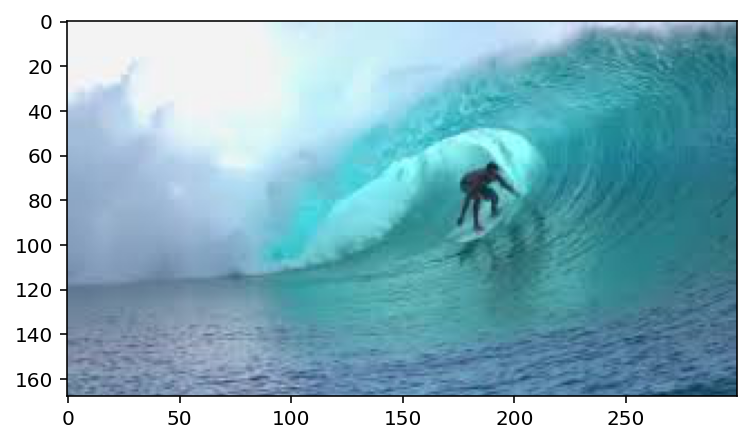

In [ ]:
image_path = '/content/surfing_data/valid/barrel/000030.jpg'
img = Image.open(image_path)
def process_image(image):
    """ 
    scales, crops, and normalizes a PIL image for a PyTorch model,
    returns an Numpy array

    """
    #process a PIL image for use in a model
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
    image = preprocess(image)
    return image

def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    #color is in third dim
    image = image.numpy().transpose((1, 2, 0))
    
    #images smaller than 0 become 0, images larger than 1 become 1
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax


with Image.open(image_path) as image:
    #displaying image to predict
    plt.imshow(image)

In [ ]:
def class_to_name(c):
  classes_dict = {
      0 :'barrel',
      1 :'bottom turn'
  }
  return [classes_dict[i] for i in c]


In [ ]:
def predict2(image_path, model, topk=2):
  """ 
  Predict the class (or classes) of an image using a trained deep learning model.
  """
  
  #implement the code to predict the class from an image file
  img = Image.open(image_path)

  #processing image to pass through model
  img = process_image(img)
  
  #convert 2D image to 1D vector
  #goes from 3 x 224 x 224 to 1 x 3 x 224 x 224
  img = np.expand_dims(img, 0)
  
  #changing from numpy to tensor 
  img = torch.from_numpy(img)
  
  #putting in evaluation if not already in
  model.eval()

  #putting on cuda
  inputs = Variable(img).to(device)

  #passing through model
  logits = model.forward(inputs)
  
  #finding probability of each output
  ps = F.softmax(logits,dim=1)

  #getting largest topk elements
  topk = ps.cpu().topk(topk)
  
  #returning in list form
  return (i.data.numpy().squeeze().tolist() for i in topk)


probs, classes = predict2(image_path, model.to(device))
print(probs)
print(class_to_name(classes))

[1.0, 4.168510154965906e-23]
['barrel', 'bottom turn']


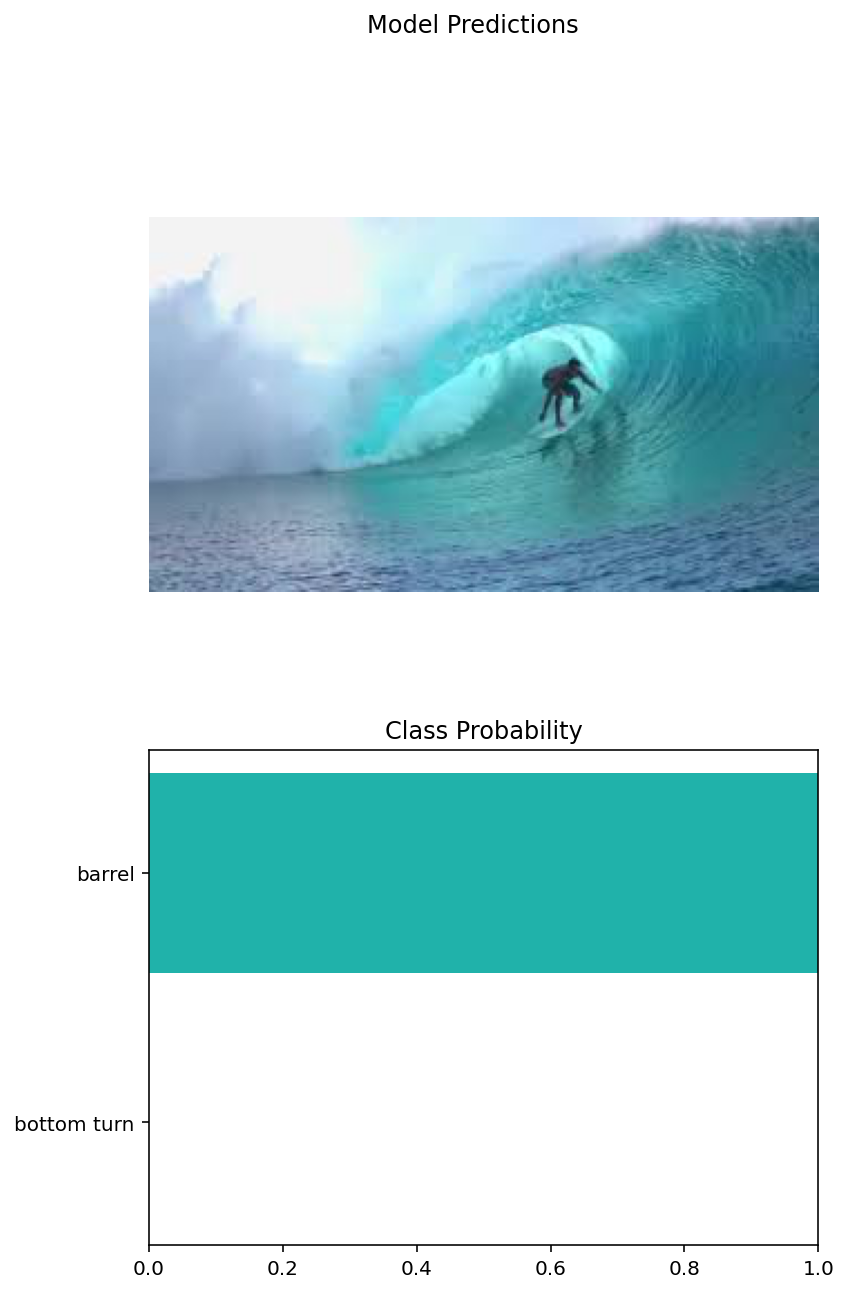

In [ ]:
def view_classify(img_path, prob, classes, mapping):
    ''' Function for viewing an image and it's predicted classes.
    '''
    image = Image.open(img_path)
    fig, (ax1, ax2) = plt.subplots(figsize=(6,10), ncols=1, nrows=2)
    ax1.imshow(image)
    ax1.axis('off')
    
    y_pos = np.arange(len(prob))
    ax2.barh(y_pos, prob, align='center', color = 'lightseagreen')
    plt.xlim(0, 1)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(class_to_name(classes))
    ax2.invert_yaxis()  # labels read top-to-bottom
    ax2.set_title('Class Probability')

    plt.suptitle('Model Predictions')

view_classify(image_path, probs, classes, None)